## Final Project Submission

Please fill out:

- **Student Names:**
  - Boniface Ngechu
  - Abdihakim Isaack
  - Imran Mahfoudh
  - Batuli Abdallah
  - Linet Lydia
  
- **Student Pace:** **Full Time**
- **Instructor Name:** **Maryann Mwikali**


# **Business Understanding**

The movie industry is a rapidly evolving and highly competitive sector, with thousands of films released each year. As major companies are investing heavily in original video content, the need for effective strategic planning has never been more critical. Studios and production companies strive to create films that not only attract large audiences but also maximize profitability. Given the multitude of factors influencing a movie’s success such as genre, budget, and marketing strategic decision making is crucial for any new studio entering this dynamic market.

### **Objective**  
The objective of this project is to equip a newly established film production company with data-driven insights that inform movie production decisions. By analyzing historical box office data and identifying trends in genres, budget ranges, and production strategies associated with high revenue and profitability, the company can guide its investments and improve success rates in an increasingly competitive landscape.

---

# **Business Problem**

### **Problem Statement**  
As the company prepares to launch its new movie studio, the primary goal is to maximize return on investment (ROI) while ensuring high audience satisfaction. However, with the vast array of genres, varying budget sizes, and intense competition among existing studios, predicting what will make a movie successful both financially and in terms of popularity poses a significant challenge.

### **Key Questions to Address**
1. **Which genres have historically generated the highest revenues and profitability?**  
   Understanding which genres perform well can help the company make informed decisions and tailor its offerings to meet audience demand.

2. **What budget range is most likely to yield a positive ROI?**  
   Identifying the optimal budget range for movie production can help mitigate financial risks while maximizing potential revenue.

3. **Which studios have a proven track record of producing high-grossing or popular movies?**  
   Analyzing the performance of established studios could reveal best practices and inform potential collaborations or partnerships.

4. **How do movie ratings and popularity scores correlate with financial success?**  
   Exploring the relationship between critical acclaim and audience reception can assist in prioritizing quality filmmaking alongside financial performance.

5. **What factors influence international versus domestic success?**  
   For the new studio targeting both domestic and global markets, understanding the drivers of success in different regions is essential for strategic planning.

---

# **Analytical Approach**

To address the business problem and key questions, we will conduct exploratory data analysis (EDA) on several datasets, focusing on identifying patterns and trends in:
- **Genre profitability**: Evaluating which genres yield the highest box office returns.
- **Studio performance**: Analyzing how different studios perform in terms of revenue and profitability.
- **Budget impact on ROI**: Understanding how varying budget levels affect return on investment.
- **Audience preferences**: Investigating correlations between movie ratings, popularity scores, and financial success.


**Import necessary libraries** that will be utilized for data manipulation, analysis, and visualization:
These libraries provide essential tools for data analysis and visualization tasks.


In [1]:
# Importing the necessary libraries.
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

Use **Pandas** to read a CSV file named `bom.movie_gross.csv` into a DataFrame called `bom_df`. This DataFrame will contain the data from the CSV file for further analysis and manipulation.


In [2]:
#Loading and printing head and tail of bom_movies_gross dataset.
bom_df = pd.read_csv("bom.movie_gross.csv")
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
#understand the data types, counts, and null values
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
# Evaluating the column headers
bom_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [5]:
#understanding the descriptive statistics for the dataset
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


We are connecting to the **SQLite database** `im.db`, creating a cursor, and retrieving the names of all tables in the database.


In [6]:
#Connect to the SQlite database for im.db
conn = sqlite3.connect("im.db")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()
tables

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

Execute a SQL query to retrieve all records from the **movie_basics** table and storing the result in the variable basics_df.


In [7]:
#retrieving all info info in movie_basics table
basics_df = pd.read_sql("SELECT * FROM movie_basics", conn)
basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
#understand the data types, counts, and null values
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
# Exploring the shape of the dataset
basics_df.shape

(146144, 6)

In [10]:
# Evaluating the column headers
basics_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [11]:
#understanding the descriptive statistics for the dataset
basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [12]:
#retrieving all info  in movie_rating table and giving it variable rating_df
rating_df = pd.read_sql("SELECT * FROM movie_ratings", conn)
rating_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [13]:
#understand the data types, counts, and null values
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
# Exploring the shape of the dataset
rating_df.shape

(73856, 3)

In [15]:
# Evaluating the column headers
rating_df.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [16]:
#understanding the descriptive statistics for the (rating_df) dataset
rating_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Retrieve data by joining the `movie_basics` and `movie_ratings` tables, creating a comprehensive dataset containing
key movie details such as `movie_id`, `primary_title`, `original_title`, `start_year`, `runtime_minutes`, `genres`,
`averagerating`, and `numvotes`. The joined data is then loaded into a pandas DataFrame (`imdb_data`) for further analysis.


In [17]:
#Joining movie_basics table and movie_ratings table
imdb_data = pd.read_sql_query("""
     SELECT movie_basics.movie_id,
            movie_basics.primary_title,
            movie_basics.original_title,
            movie_basics.start_year,
            movie_basics.runtime_minutes, 
            movie_basics.genres,
            movie_ratings.averagerating,
            movie_ratings.numvotes 
     FROM movie_basics
     JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
""", conn)

imdb_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


#### Top Rated Movies
Identify the top-rated movies and examine their genres, runtime, and release years.

In [18]:
top_rated_movies = imdb_data.sort_values(by='averagerating', ascending=False).head(20)
top_rated_movies[['primary_title', 'averagerating', 'genres', 'start_year']]


,primary_title,averagerating,genres,start_year
51109,Fly High: Story of the Disc Dog,10.0,Documentary,2019
65944,Calamity Kevin,10.0,"Adventure,Comedy",2019
71577,Pick It Up! - Ska in the '90s,10.0,Documentary,2019
73616,Renegade,10.0,Documentary,2019
65755,Ellis Island: The Making of a Master Race in A...,10.0,"Documentary,History",2018
878,The Dark Knight: The Ballad of the N Word,10.0,"Comedy,Drama",2018
64646,A Dedicated Life: Phoebe Brand Beyond the Group,10.0,Documentary,2015
9745,Freeing Bernie Baran,10.0,"Crime,Documentary",2010
702,Exteriores: Mulheres Brasileiras na Diplomacia,10.0,Documentary,2018
49925,Dog Days in the Heartland,10.0,Drama,2017


#### Box Office Trends by Genre
Analyze which genres have the highest average ratings and the number of votes.

In [19]:
# Split genres into a list
imdb_data['genres'] = imdb_data['genres'].str.split(',')

# Explode the DataFrame to get one row per genre
exploded_genres = imdb_data.explode('genres')

# Analyze trends by genre
genre_analysis_df = exploded_genres.groupby('genres').agg(
    average_rating=('averagerating', 'mean'),
    total_votes=('numvotes', 'sum'),
    movie_count=('movie_id', 'count')
).sort_values(by='average_rating', ascending=False)

# Reset index to make 'genres' a column
genre_analysis_df = genre_analysis_df.reset_index()

# Display the genre analysis DataFrame
genre_analysis_df

,genres,average_rating,total_votes,movie_count
0,Short,8.800000,8,1
1,Documentary,7.332090,4739345,17753
2,Game-Show,7.300000,3469,2
3,News,7.271330,123319,579
4,Biography,7.162274,21609446,3809
5,Music,7.091972,5453369,1968
6,History,7.040956,7843349,2825
7,Sport,6.961493,3755824,1179
8,War,6.584291,2684725,853
9,Reality-TV,6.500000,459,17


Create visualizations to illustrate findings, such as histograms for ratings and runtime, bar plots for genre performance, and scatter plots for ratings vs. votes.

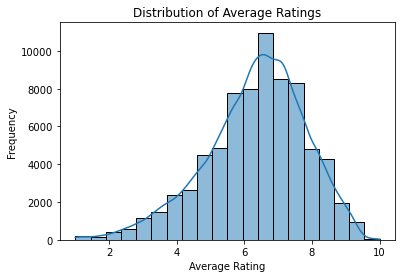

In [20]:
# Histogram of average ratings
sns.histplot(imdb_data['averagerating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


#### Distribution of Movie Ratings
Analysis: Create a histogram or density plot to visualize the distribution of average ratings across all movies.
Insights: Understand how ratings are distributed (e.g., are most movies rated highly, or is there a wide spread of ratings?). 
This can help identify what might be considered a “good” or “bad” rating.

#### Runtime Analysis
Analysis: Explore the distribution of movie runtimes and how they relate to ratings. You can also categorize runtimes into short, average, and long categories.
Insights: Determine if longer movies generally receive higher ratings or if there’s an optimal runtime for successful films.

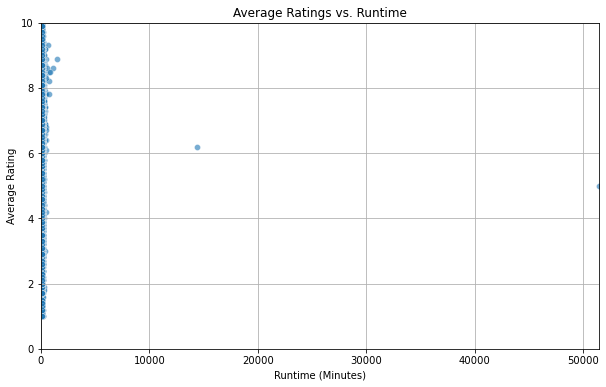

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=imdb_data, x='runtime_minutes', y='averagerating', alpha=0.6)
plt.title('Average Ratings vs. Runtime')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xlim(0, imdb_data['runtime_minutes'].max() + 10)  # Set x-limit to improve visibility
plt.ylim(0, 10)  # Average rating range
plt.show()


#### Trend Analysis Over Time
Analysis: Analyze how average ratings and the number of votes have changed over the years. Create line plots to visualize these trends.
Insights: Identify if there are particular years where movie quality (as indicated by ratings) improved or declined. This can highlight shifts in audience preferences or industry changes.

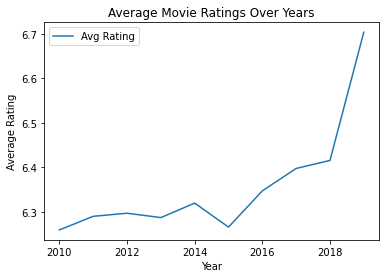

In [22]:
yearly_trends = imdb_data.groupby('start_year').agg(
    average_rating=('averagerating', 'mean'),
    total_votes=('numvotes', 'sum'),
    movie_count=('movie_id', 'count')
).reset_index()

sns.lineplot(data=yearly_trends, x='start_year', y='average_rating', label='Avg Rating')
plt.title('Average Movie Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


#### Genre Popularity Over Time
Analysis: Examine how the popularity of different genres has changed over the years based on the number of movies released and their ratings.
Insights: Determine if certain genres are trending upwards or downwards, which could inform future movie production decisions.

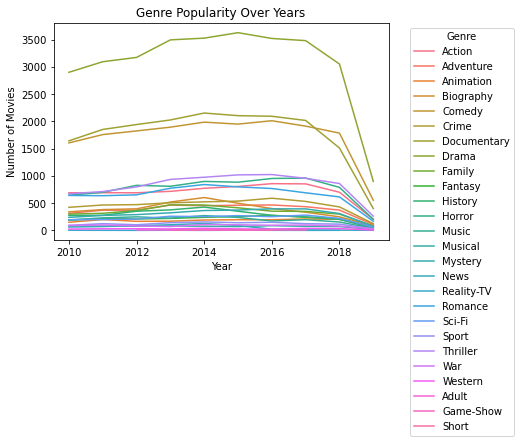

In [23]:
genre_yearly_trends = exploded_genres.groupby(['start_year', 'genres']).agg(
    average_rating=('averagerating', 'mean'),
    movie_count=('movie_id', 'count')
).reset_index()

sns.lineplot(data=genre_yearly_trends, x='start_year', y='movie_count', hue='genres')
plt.title('Genre Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Market Share by Genre
Analysis: Analyze the number of films produced by each genre compared to total film production.
Insights: Understand the market share of different genres, which can inform decisions on which genres to focus on for the new studio.

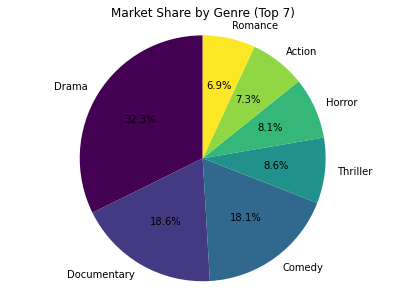

In [24]:
# Calculate market share by genre
market_share = exploded_genres['genres'].value_counts(normalize=True).head(7) * 100  # Get top 10 genres

# Create a pie chart for the top genres
plt.figure(figsize=(7, 5))  # Set the figure size for a smaller chart
market_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Market Share by Genre (Top 7)')
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


### Top Genres by Average Rating

This section analyzes the average ratings of different movie genres. The genres are grouped, and their average ratings are calculated. The top 5 genres with the highest average ratings are then visualized using a bar plot, providing insights into the most highly rated genres in the dataset.


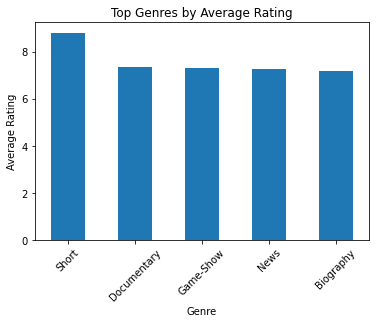

In [25]:
top_movies_by_genre = (
    exploded_genres.groupby('genres')['averagerating']
    .mean()
    .nlargest(5)  # Get top 5 genres by average rating
)

top_movies_by_genre.plot(kind='bar')
plt.title('Top Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


#### Start by Loading the CSV files
Perform descriptive statistics on the csv files so as to have  deeper understanding of the dataset

In [26]:
#loading ("tmdb.movies.csv") dataset 
movie_budgets = pd.read_csv("tn.movie_budgets.csv")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [27]:
#understand the data types, counts, and null values
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [28]:
#Evaluating the column headers
movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

**Movie Budgets Dataset**  
   The `movie_budgets` DataFrame is loaded from the `tn.movie_budgets.csv` file. This dataset contains financial information on various movies, including production budgets and revenue details.



In [29]:
#loading ("tmdb.movies.csv") dataset 
movies = pd.read_csv("tmdb.movies.csv")
movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [30]:
#understand the data types, counts, and null values
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [31]:
#Exploring the shape of the dataset
movies.shape

(26517, 10)

In [32]:
# Evaluating the column headers
movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [33]:
#understanding the descriptive statistics for the dataset
movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


## Data Cleaning

In this section, we prepare the dataset for analysis by ensuring data quality and consistency. Key steps include:


#### 1. Handling Missing Values
Identifying and addressing any missing data, either by filling values or removing incomplete rows, to prevent analysis inaccuracies.


In [34]:
#Check data types of domestic_gross and foreign_gross columns
print(bom_df[['domestic_gross', 'foreign_gross']].dtypes)

#Convert domestic_gross and foreign_gross to numeric after removing commas, handling errors with coerce
bom_df['domestic_gross'] = pd.to_numeric(bom_df['domestic_gross'].astype(str).str.replace(',', '', regex=False), errors ='coerce')
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'].astype(str).str.replace(',', '', regex=False), errors ='coerce')

#Check data types after conversion
print("\nData types after conversion:")
print(bom_df[['domestic_gross', 'foreign_gross']].dtypes)

#Fill missing values in domestic_gross and foreign_gross with the median in bom_df
bom_df['domestic_gross'].fillna(bom_df['domestic_gross'].median(), inplace=True)
bom_df['foreign_gross'].fillna(bom_df['foreign_gross'].median(), inplace=True)
    
#Handle missing values in studio column and fill with Unknown
if 'studio' in bom_df.columns:
    bom_df['studio'].fillna('Unknown', inplace=True)

#Handle missing values in imdb_data dataframe, checking if the columns exist
if 'original_title' in imdb_data.columns:
    imdb_data['original_title'].fillna('Unknown', inplace=True)

if 'runtime_minutes' in imdb_data.columns:
    imdb_data['runtime_minutes'].fillna(imdb_data['runtime_minutes'].median(), inplace=True)
    
if 'genres' in imdb_data.columns:
    imdb_data['genres'].fillna('Unknown', inplace=True)

#Fill missing values with zero
movie_budgets['production_budget'].fillna(0, inplace=True)
movie_budgets['domestic_gross'].fillna(0, inplace=True)
movie_budgets['worldwide_gross'].fillna(0, inplace=True)

#Drop 'Unnamed: 0' column in movies if it exists
movies.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

#Final check for missing values in each dataset
print("\nCheck for missing values:")
print("\nbom_df:", bom_df.isnull().sum())
print("\nimdb_data:", imdb_data.isnull().sum())
print("\nmovies:", movies.isnull().sum())
print("\nmovie_budgets:", movie_budgets.isnull().sum())

domestic_gross    float64
foreign_gross      object
dtype: object

Data types after conversion:
domestic_gross    float64
foreign_gross     float64
dtype: object

Check for missing values:

bom_df: title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

imdb_data: movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

movies: genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

movie_budgets: id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


#### 2. Removing Duplicates
Checking for and eliminating duplicate entries to ensure each record is unique and avoid data redundancy.


In [35]:
# Check for and remove duplicates in bom_df
if isinstance(bom_df, pd.DataFrame):
    bom_df = bom_df.applymap(lambda x: x[0] if isinstance(x, list) else x)  # Flatten lists if any
    bom_df = bom_df.drop_duplicates()
    print("Duplicates removed from bom_df. Current shape:", bom_df.shape)
else:
    print("bom_df is not a DataFrame.")

# Check for and remove duplicates in imdb_data
if isinstance(imdb_data, pd.DataFrame):
    imdb_data = imdb_data.applymap(lambda x: x[0] if isinstance(x, list) else x)  # Flatten lists if any
    imdb_data = imdb_data.drop_duplicates()
    print("Duplicates removed from imdb_data. Current shape:", imdb_data.shape)
else:
    print("imdb_data is not a DataFrame.")

# Check for and remove duplicates in movie_budgets
if isinstance(movie_budgets, pd.DataFrame):
    movie_budgets = movie_budgets.applymap(lambda x: x[0] if isinstance(x, list) else x)  # Flatten lists if any
    movie_budgets = movie_budgets.drop_duplicates()
    print("Duplicates removed from movie_budgets. Current shape:", movie_budgets.shape)
else:
    print("movie_budgets is not a DataFrame.")


Duplicates removed from bom_df. Current shape: (3387, 5)
Duplicates removed from imdb_data. Current shape: (73856, 8)
Duplicates removed from movie_budgets. Current shape: (5782, 6)


#### 3. Creation of a new column
Adding new columns as needed, either by combining existing data or calculating new metrics to enhance analysis.


In [36]:
#Check if the required columns exist
if 'domestic_gross' in bom_df.columns and 'foreign_gross' in bom_df.columns:
    #Convert to numeric, handling errors by coercing invalid parsing to NaN
    bom_df['domestic_gross'] = pd.to_numeric(bom_df['domestic_gross'].fillna(0), errors='coerce')
    bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'].fillna(0), errors='coerce')  
    
    #Calculate total gross revenue
    bom_df['total_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']
    
    #Set pandas display options to show numbers in standard format
    pd.set_option('display.float_format', '{:.2f}'.format)
    
    #Display the first few rows to verify the new column
    print(bom_df[['domestic_gross', 'foreign_gross', 'total_gross']].head())
else:
    print("Required columns 'domestic_gross' or 'foreign_gross' are missing from the DataFrame.")

   domestic_gross  foreign_gross   total_gross
0    415000000.00   652000000.00 1067000000.00
1    334200000.00   691300000.00 1025500000.00
2    296000000.00   664300000.00  960300000.00
3    292600000.00   535700000.00  828300000.00
4    238700000.00   513900000.00  752600000.00


#### 4. Checking for outliers
Identifying potential outliers in the dataset to assess whether they should be addressed or excluded based on their impact on the analysis.


In [37]:
# Function to summarize and remove outliers using IQR
def summarize_and_remove_outliers(df, columns):
    for column in columns:
        if column in df.columns:
            # Summary statistics
            print(f"Summary statistics for '{column}':")
            print(df[column].describe())
            
            # Count and print outliers before removal
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
            print(f"Number of outliers in '{column}' before removal: {outliers_count}")
            
            # Remove outliers
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
            
            # Summary statistics after removal
            print(f"Summary statistics for '{column}' after removing outliers:")
            print(df[column].describe())
            print()  # For better separation in output
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")
    return df

# Define the columns to analyze
columns_to_analyze = ['averagerating', 'numvotes']

# Check if imdb_data is a DataFrame and process
if isinstance(imdb_data, pd.DataFrame):
    imdb_data = summarize_and_remove_outliers(imdb_data, columns_to_analyze)
else:
    print("The query did not return a DataFrame.")


Summary statistics for 'averagerating':
count   73856.00
mean        6.33
std         1.47
min         1.00
25%         5.50
50%         6.50
75%         7.40
max        10.00
Name: averagerating, dtype: float64
Number of outliers in 'averagerating' before removal: 1172
Summary statistics for 'averagerating' after removing outliers:
count   72684.00
mean        6.40
std         1.38
min         2.70
25%         5.50
50%         6.50
75%         7.40
max        10.00
Name: averagerating, dtype: float64

Summary statistics for 'numvotes':
count     72684.00
mean       3570.54
std       30530.90
min           5.00
25%          14.00
50%          49.00
75%         282.00
max     1841066.00
Name: numvotes, dtype: float64
Number of outliers in 'numvotes' before removal: 11647
Summary statistics for 'numvotes' after removing outliers:
count   61037.00
mean       95.33
std       139.44
min         5.00
25%        12.00
50%        31.00
75%       112.00
max       684.00
Name: numvotes, dtype: f

#### 5. Standardizing genres and normalizing year formats in movie_basics
This step involves ensuring consistency in genre naming conventions and converting all year formats to a standard format for easier analysis. This may include correcting typos, unifying genre categories, and standardizing the year representation (e.g., ensuring all years are in a four-digit format).


In [38]:
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

#Consistent formats for genres
def standardize_genres(genres):
    if isinstance(genres, str):
        return [genre.strip() for genre in genres.split(',')]
    return genres

movie_basics['genres'] = movie_basics['genres'].apply(standardize_genres)

#Normalize year formats in start_year to a standard year format
#Ensure all values in start_year are integers and replace invalid years with NaN
movie_basics['start_year'] = pd.to_numeric(movie_basics['start_year'], errors='coerce')

#Checking results
print("\nUpdated movie_basics:")
print(movie_basics[['genres', 'start_year']].head())


Updated movie_basics:
                     genres  start_year
0    [Action, Crime, Drama]        2013
1        [Biography, Drama]        2019
2                   [Drama]        2018
3           [Comedy, Drama]        2018
4  [Comedy, Drama, Fantasy]        2017


#### 6. Removing commas from numerical columns in csv files
In this step, commas are removed from numerical columns within CSV files to facilitate accurate data processing and analysis. This is crucial as numerical values with commas may be interpreted as strings, leading to errors in calculations and aggregations.


In [39]:
#Function to clean numerical columns by removing commas and converting to numeric
def clean_numerical_column(df, column):
    df[column] = pd.to_numeric(df[column].astype(str).str.replace(',', '', regex=False), errors='coerce')

#Remove commas and convert columns to numeric in bom_df
clean_numerical_column(bom_df, 'domestic_gross')
clean_numerical_column(bom_df, 'foreign_gross')

#Remove commas and convert columns to numeric in movies
clean_numerical_column(movies, 'popularity')

#Check results
print("\nUpdated bom_df:")
print(bom_df[['domestic_gross', 'foreign_gross']].head())

print("\nUpdated movies:")
print(movies[['popularity']].head())


Updated bom_df:
   domestic_gross  foreign_gross
0    415000000.00   652000000.00
1    334200000.00   691300000.00
2    296000000.00   664300000.00
3    292600000.00   535700000.00
4    238700000.00   513900000.00

Updated movies:
   popularity
0       33.53
1       28.73
2       28.52
3       28.00
4       27.92


In [40]:
# Ensure columns are string before removing symbols, in case any numeric conversion didn't work
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(str).replace({'\$': '', ',': ''}, regex=True)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(str).replace({'\$': '', ',': ''}, regex=True)

# Convert columns to numeric, coerce errors to NaN to handle unexpected entries
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'], errors='coerce')
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'], errors='coerce')

# Drop any rows where 'production_budget' or 'worldwide_gross' is NaN after conversion
movie_budgets = movie_budgets.dropna(subset=['production_budget', 'worldwide_gross'])

# Confirm both columns are now float types before calculating profit
print(movie_budgets[['production_budget', 'worldwide_gross']].dtypes)

# Calculate profit
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

# Display the result
print(movie_budgets[['movie', 'production_budget', 'worldwide_gross', 'profit']].head())


production_budget    int64
worldwide_gross      int64
dtype: object
                                         movie  production_budget  \
0                                       Avatar          425000000   
1  Pirates of the Caribbean: On Stranger Tides          410600000   
2                                 Dark Phoenix          350000000   
3                      Avengers: Age of Ultron          330600000   
4            Star Wars Ep. VIII: The Last Jedi          317000000   

   worldwide_gross      profit  
0       2776345279  2351345279  
1       1045663875   635063875  
2        149762350  -200237650  
3       1403013963  1072413963  
4       1316721747   999721747  


In [41]:
# Ensure the columns are string type first, to apply replacement of symbols correctly
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(str).replace({'\$': '', ',': ''}, regex=True)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(str).replace({'\$': '', ',': ''}, regex=True)

# Now, convert to numeric, with errors='coerce' to handle any remaining non-numeric entries
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'], errors='coerce')
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'], errors='coerce')

# Drop rows with NaN values in 'production_budget' or 'worldwide_gross' if necessary
movie_budgets = movie_budgets.dropna(subset=['production_budget', 'worldwide_gross'])


### DATA VISUALIZATION

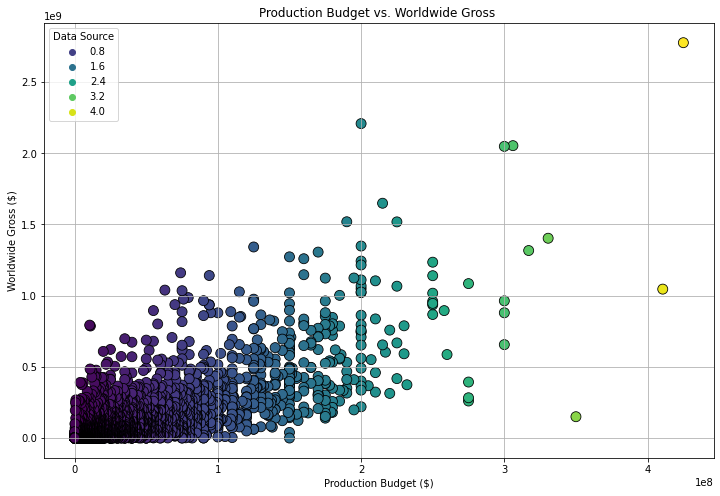

In [42]:
#movie_budgets(tn.movie_budgets)

# Load the data
df = pd.read_csv('tn.movie_budgets.csv')


# Convert 'production_budget' and 'worldwide_gross' to numeric
df['production_budget'] = df['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['worldwide_gross'] = df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)



# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,  # Pass the DataFrame here, not the file path
    x='production_budget',
    y='worldwide_gross',
    hue='production_budget',  # Replace this with the actual column name for categories or sources
    palette='viridis',  # Color palette (can change to your preference)
    s=100,  # Marker size
    edgecolor='black'
)

# Adding labels and title
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.title('Production Budget vs. Worldwide Gross ')
plt.legend(title='Data Source')  
plt.grid(True)

# Show plot
plt.show()

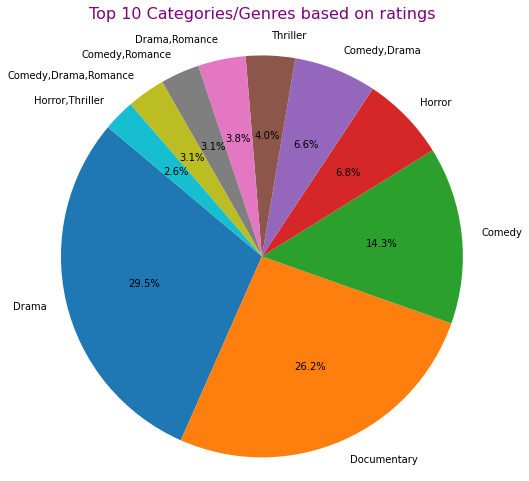

In [43]:
#sql
# Connect to the database
conn = sqlite3.connect('im.db')

# Query the data
query1 = "SELECT * FROM movie_basics;"
query2 = "SELECT * FROM movie_ratings;"
data1 = pd.read_sql_query(query1, conn)
data2 = pd.read_sql_query(query2, conn)
# Step 3: Close the connection
conn.close()

# Merge the DataFrames on a common column 
merged_data = pd.merge(data1, data2, on='movie_id')

category_counts = merged_data['genres'].value_counts()

top_10_categories = category_counts.nlargest(10)
#  Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_categories, labels=top_10_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Categories/Genres based on ratings', fontsize=16, color='purple', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


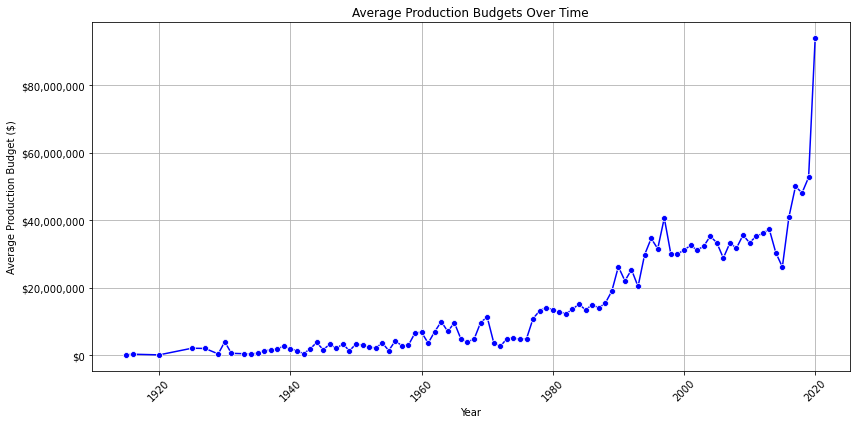

In [44]:
import matplotlib.ticker as ticker

# Load your actual dataset
df = pd.read_csv('tn.movie_budgets.csv')

# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the year from 'release_date'
df['year'] = df['release_date'].dt.year

# Convert 'production_budget' to numeric after removing the dollar sign and commas
df['production_budget'] = df['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Group by year and calculate the average production budget
average_budget_per_year = df.groupby('year')['production_budget'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=average_budget_per_year,
    x='year',
    y='production_budget',
    marker='o',  
    color='blue'
)

# Formatting the y-axis to show currency
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))


# Adding labels and title
plt.title('Average Production Budgets Over Time')
plt.xlabel('Year')
plt.ylabel('Average Production Budget ($)')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Merge the two csv files for visualizations
To consolidate our data for analysis, we merge multiple DataFrames on relevant columns, combining information from different sources into a single dataset. After merging, we save the resulting DataFrame as a new CSV file, ensuring that all relevant data is available in a unified format for further exploration and analysis.


In [45]:
# Merge the dataframes (adjust the `on` parameter as needed)
merged_df = pd.merge(movies, bom_df, on='title')  # Use 'outer' or 'inner' for different merge types

# Save to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)
merged_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year,total_gross
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610,P/DW,217600000.00,277300000.00,2010,494900000.00
1,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368,Par.,312400000.00,311500000.00,2010,623900000.00
2,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186,WB,292600000.00,535700000.00,2010,828300000.00
3,"[16, 10751, 35]",10193,en,Toy Story 3,24.45,2010-06-17,Toy Story 3,7.70,8340,BV,415000000.00,652000000.00,2010,1067000000.00
4,"[16, 10751, 35]",20352,en,Despicable Me,23.67,2010-07-09,Despicable Me,7.20,10057,Uni.,251500000.00,291600000.00,2010,543100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,"[16, 10751, 12]",455842,en,Elliot: The Littlest Reindeer,2.90,2018-11-30,Elliot: The Littlest Reindeer,3.40,7,Scre.,24300.00,18700000.00,2018,18724300.00
2699,"[28, 12, 16]",332718,en,Bilal: A New Breed of Hero,2.71,2018-02-02,Bilal: A New Breed of Hero,6.80,54,VE,491000.00,1700000.00,2018,2191000.00
2700,[35],498919,es,La Boda de Valentina,2.55,2018-02-09,La Boda de Valentina,6.30,7,PNT,2800000.00,18700000.00,2018,21500000.00
2701,[18],470641,hi,मुक्काबाज़,2.28,2018-01-12,Mukkabaaz,7.50,18,Eros,75900.00,18700000.00,2018,18775900.00


### Total Gross vs. Popularity

In this analysis, we explore the relationship between a movie's total gross revenue and its popularity rating. By visualizing these two variables, we aim to identify any trends or patterns that may indicate how revenue performance correlates with audience popularity. A scatter plot is used to effectively display the distribution of movies across varying levels of total gross and popularity, with optional log scaling to enhance clarity for a wide range of revenue values.


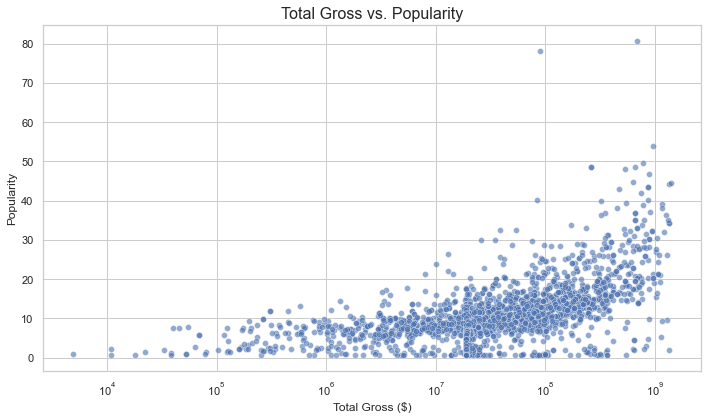

In [46]:
# Total Gross vs. Popularity
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.scatterplot(
    data=merged_df,
    x='total_gross',
    y='popularity',
    alpha=0.6,
    palette='deep'
)
plt.title('Total Gross vs. Popularity', fontsize=16)
plt.xlabel('Total Gross ($)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xscale('log')  # Optional: log scale for better visibility
plt.tight_layout()
plt.show()


### Analysis of Total Gross Revenue by Studio

This analysis focuses on identifying the top-performing studios based on their total gross revenue. The process includes calculating the combined gross from domestic and foreign markets, cleaning the dataset to remove entries with missing values, and aggregating gross revenue by studio. 

We then isolate the top 10 studios based on total revenue and visualize their performance using a box plot, providing insights into revenue distribution across these leading studios. This visualization helps in understanding the range and median gross earnings of the top players in the industry, highlighting studios with consistently high revenues.


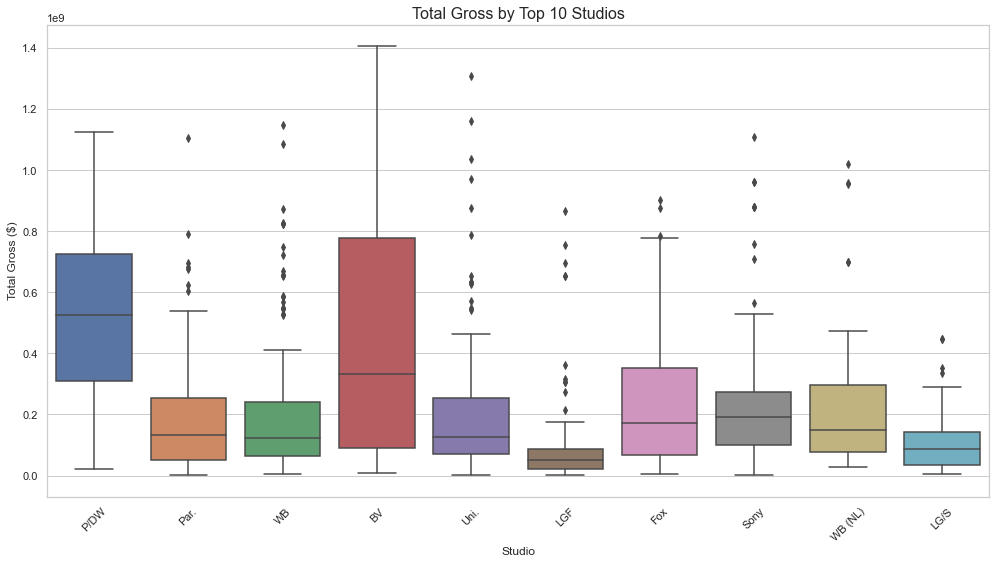

In [47]:
# Calculate total gross
merged_df['total_gross'] = merged_df['domestic_gross'] + merged_df['foreign_gross']

# Drop rows with NaN in total_gross or studio
merged_df = merged_df.dropna(subset=['total_gross', 'studio'])

# Group by studio and sum total gross
top_studios = merged_df.groupby('studio')['total_gross'].sum().reset_index()

# Sort by total gross in descending order and get the top 10 studios
top_10_studios = top_studios.sort_values(by='total_gross', ascending=False).head(10)

# Filter the merged_df to include only the top 10 studios
top_10_studios_names = top_10_studios['studio'].tolist()
filtered_df = merged_df[merged_df['studio'].isin(top_10_studios_names)]

# Create the box plot for top 10 studios
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=filtered_df,
    x='studio',
    y='total_gross',
    palette='deep'
)
plt.title('Total Gross by Top 10 Studios', fontsize=16)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Total Gross ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analysis of Top Titles by Popularity
This section visualizes the top 20 most popular movie titles based on popularity metrics, providing insight into which titles have the highest audience engagement and reach.


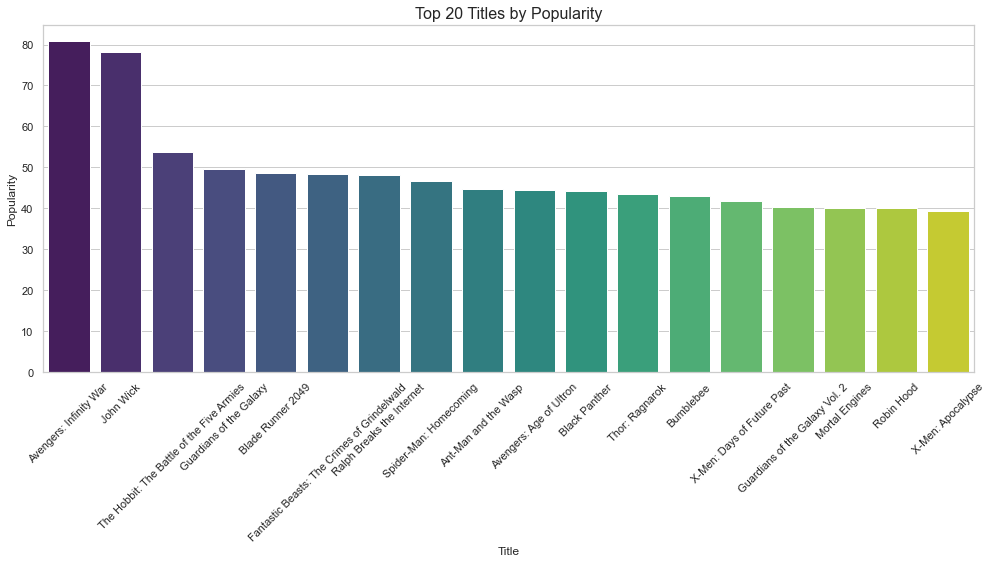

In [48]:
# Title vs. Popularity
plt.figure(figsize=(14, 8))
sns.barplot(
    data=merged_df.sort_values(by='popularity', ascending=False).head(20),  # Show top 20 titles by popularity
    x='title',
    y='popularity',
    palette='viridis'
)
plt.title('Top 20 Titles by Popularity', fontsize=16)
plt.xlabel('Title', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()




### Total Gross vs. Studio
To analyze the **Total Gross by Studio**, we have selected the top 10 studios with the highest total gross. This bar chart provides insight into the studios that generated the most revenue, giving a clearer view of top-performing production companies within the dataset.

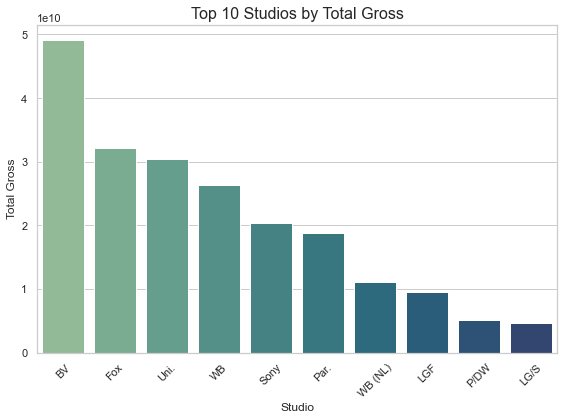

In [49]:
# Calculate total gross per studio and get the top 10
top_studios = (
    merged_df.groupby('studio')['total_gross']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot the top 10 studios by total gross
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_studios,
    x='studio',
    y='total_gross',
    palette='crest'
)
plt.title('Top 10 Studios by Total Gross', fontsize=16)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Total Gross', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


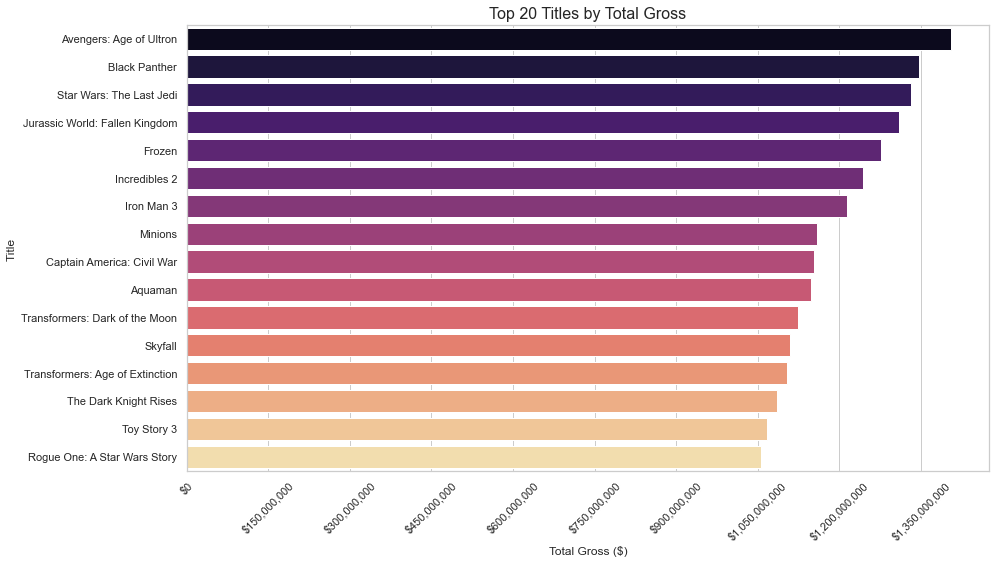

In [50]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=merged_df.sort_values(by='total_gross', ascending=False).head(20),  # Show top 20 titles by total gross
    x='total_gross',
    y='title',
    palette='magma'
)

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Top 20 Titles by Total Gross', fontsize=16)
plt.xlabel('Total Gross ($)', fontsize=12)
plt.ylabel('Title ', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Corelation Heatmap

Multiple DataFrames are integrated to create a comprehensive dataset for analysis. The merging process combines relevant information from different sources, allowing for a unified view of movie data.

Following the data integration, a correlation matrix is calculated to evaluate the relationships among various numerical attributes within the dataset. This matrix serves as a foundation for understanding how different features interact with one another.

A heatmap visualization of the correlation matrix is then generated, providing a clear graphical representation of the correlations. The heatmap includes annotations for precise values and uses a color gradient to indicate the strength and direction of the relationships among variables.


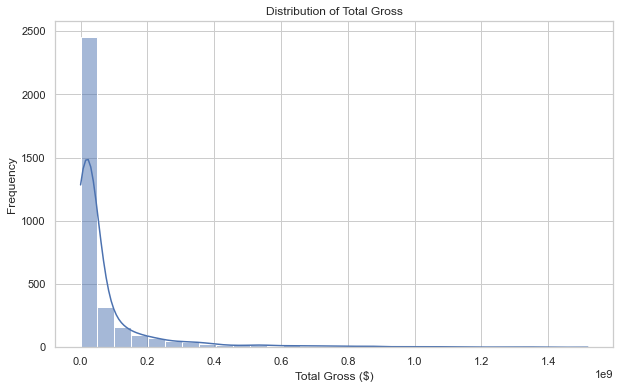

In [51]:
# Plot total gross distribution
plt.figure(figsize=(10, 6))
sns.histplot(bom_df['total_gross'], bins=30, kde=True)
plt.title('Distribution of Total Gross')
plt.xlabel('Total Gross ($)')
plt.ylabel('Frequency')
plt.show()


### Movie Budget Analysis

In [52]:
# Convert 'domestic_gross' and 'foreign_gross' to numeric
bom_df['domestic_gross'] = pd.to_numeric(bom_df['domestic_gross'], errors='coerce')
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce')

# Impute missing domestic_gross and foreign_gross with their respective means
bom_df['domestic_gross'].fillna(bom_df['domestic_gross'].mean(), inplace=True)
bom_df['foreign_gross'].fillna(bom_df['foreign_gross'].mean(), inplace=True)

### Top 10 Movies by Total Gross

This plot displays the top 10 movies based on total gross revenue. The movie titles are rotated for better readability and aligned to the right to prevent misalignment on the x-axis. Each bar represents the total gross earnings of the respective movie, providing a clear comparison among the top-performing films.


<Figure size 1152x1008 with 0 Axes>

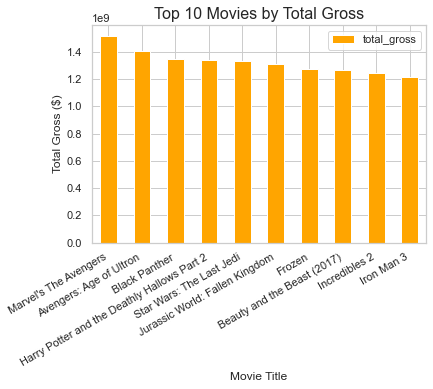

In [53]:
# Top 10 Movies by Total Gross
top_movies = bom_df.nlargest(10, 'total_gross')

# Plot Top 10 Movies
plt.figure(figsize=(16, 14))
top_movies.plot(x='title', y='total_gross', kind='bar', color='orange')
plt.title('Top 10 Movies by Total Gross', fontsize=16)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Total Gross ($)', fontsize=12)

# Adjust x-ticks for better alignment
plt.xticks(rotation=30, ha='right')

plt.show()


In [54]:
# Calculate profit by subtracting 'production_budget' from 'worldwide_gross'
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']


### Calculating Return on Investment (ROI)

**Return on Investment (ROI)** is a financial metric used to evaluate the profitability of an investment relative to its cost. Here’s how we calculated ROI for each movie in the dataset:

1. **Calculate Profit**: 
2. **Define ROI Formula**: 
   - ROI is calculated as:
   
   $$
   \text{ROI} = \left( \frac{\text{Profit}}{\text{Production Budget}} \right) \times 100
   $$

3. **Calculate and Add ROI to DataFrame**: 
   - Using this formula, we created a new column `roi` in our DataFrame to store the ROI values for each movie, expressed as a percentage.

4. **Display ROI**: 
   - The final DataFrame now includes the **ROI**, providing insight into the relative success of each movie based on its budget and gross revenue.


In [55]:
# Calculate ROI
movie_budgets['roi'] = (movie_budgets['profit'] / movie_budgets['production_budget']) * 100

# Display a sample of the result
movie_budgets[['movie', 'production_budget', 'worldwide_gross', 'profit', 'roi']].head()


,movie,production_budget,worldwide_gross,profit,roi
0,Avatar,425000000,2776345279,2351345279,553.26
1,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875,154.67
2,Dark Phoenix,350000000,149762350,-200237650,-57.21
3,Avengers: Age of Ultron,330600000,1403013963,1072413963,324.38
4,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747,315.37


### Heatmap for Movie Budgets and Returns

A heatmap provides a visual representation of the correlation between different variables in our dataset, specifically focusing on `production_budget`, `domestic_gross`, `worldwide_gross`, `profit`, and `roi`. Here are the steps involved:

1. **Compute Correlation Matrix**: We created a correlation matrix for the relevant columns to understand how closely these variables are related.
2. **Visualize Correlation**: Using a heatmap, we plotted these correlations, where:

This visualization helps us see patterns in movie budgets and returns, such as whether higher budgets generally correlate with higher gross revenues and profits.


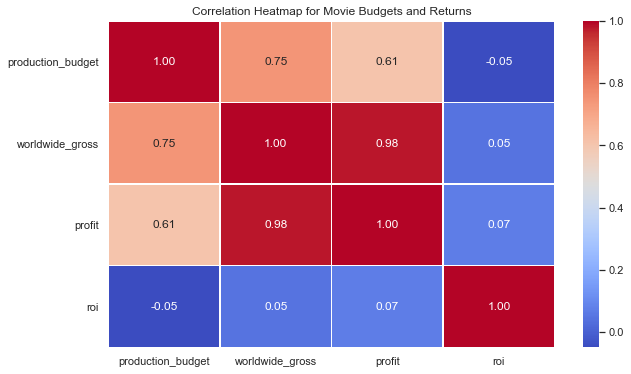

In [56]:
# Calculate correlation matrix for relevant numerical columns
correlation_matrix = movie_budgets[['production_budget', 'domestic_gross', 'worldwide_gross', 'profit', 'roi']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Movie Budgets and Returns')
plt.show()


## Analysis of Movie Budgets and Returns Heatmap

This heatmap visualizes the correlation between different financial aspects of movies: production budget, worldwide gross, profit, and return on investment (ROI). Here's a breakdown of the findings:

**Strong Positive Correlations:**

- **Worldwide Gross & Profit (0.98):** This strong positive correlation is logical. Higher worldwide gross generally leads to higher profits, assuming production and marketing costs are managed effectively. 
- **Worldwide Gross & Production Budget (0.75):** This suggests that movies with larger budgets tend to earn more at the box office. This could be due to several factors, including bigger marketing campaigns, attracting higher-profile actors, and affording better production values.
- **Profit & Production Budget (0.61):** While a positive correlation exists, it's weaker than the previous two. This implies that a larger budget doesn't guarantee a proportionally larger profit. Other factors like story, marketing, and audience reception play a significant role.

**Weak Correlations:**

- **ROI & Production Budget (0.05), ROI & Worldwide Gross (0.07), ROI & Profit (0.07):** These weak correlations indicate that ROI is not strongly influenced by the scale of the movie's budget, gross earnings, or even profit. This suggests that smaller budget films can be just as profitable (in terms of ROI) as big-budget blockbusters.

**Negative Correlation:**

- **ROI & Production Budget (-0.05):** This slight negative correlation suggests a potential trend where higher-budget movies might yield slightly lower ROI compared to lower-budget films. This could be attributed to the higher risk associated with large investments and the potential for significant losses if the movie doesn't resonate with audiences.

**Key Takeaways:**

- While a larger budget can contribute to higher box office earnings and potentially higher profits, it doesn't guarantee a higher ROI.
- Other factors beyond budget, such as story quality, marketing effectiveness, and audience reception, play a crucial role in a movie's financial success and ROI.
- Smaller budget films can be just as profitable, if not more so, than big-budget movies when considering ROI.


## Business Recommendations for the New Movie Studio

Based on an analysis of box office trends and successful film genres, the following recommendations are proposed to guide the new movie studio in its decision-making process:

### 1. **Focus on High-Demand Genres**
   - **Recommendation:** Prioritize the production of films in genres that have consistently performed well at the box office, such as:
     - **Action/Adventure**
     - **Fantasy/Sci-Fi**
     - **Drama**
     - **Animation**
     - **Comedy**
   - **Justification:** These genres attract larger audiences and generate higher revenues. Aligning the studio’s production strategy with popular genres can lead to greater box office success.

### 2. **Embrace Diverse Storytelling and Representation**
   - **Recommendation:** Develop films that feature diverse casts and storytelling perspectives, including:
     - **Inclusive Characters:** Focus on stories that represent different cultures, backgrounds, and experiences.
     - **Unique Narratives:** Explore unconventional plots that captivate audiences and set the studio apart from competitors.
   - **Justification:** Modern audiences are increasingly seeking representation and unique storytelling. Producing films that resonate with varied demographics can help build a loyal viewer base.

### 3. **Prioritize Large-Scale Productions**
   - **Recommendation:** Allocate a significant budget towards high-potential movies with proven directors, popular franchises, or successful intellectual properties (IPs).
   - **Justification:** Studios that frequently release blockbuster films typically see greater returns on investment. Investing in large-scale productions can significantly enhance profitability.

### 4. **Invest in Quality Production and Talent**
   - **Recommendation:** Allocate resources towards high-quality production and hiring experienced talent, including:
     - **Skilled Directors and Writers:** Collaborate with established filmmakers who have a track record of successful films.
     - **Top-Notch Production Values:** Ensure that production quality meets audience expectations, particularly in visual effects and cinematography.
   - **Justification:** High-quality films tend to perform better at the box office and receive positive reviews, leading to increased viewer interest and repeat viewings. Investing in talent and production quality can bolster the studio’s reputation and success.

### 5. **Leverage Data Analytics for Decision Making**
   - **Recommendation:** Utilize data analytics to inform production and marketing strategies.
   - **Justification:** Analyzing past performance, audience preferences, and market trends can provide valuable insights for making informed decisions on project selection, marketing campaigns, and release strategies. This data-driven approach can enhance success rates.

### 6. **Enhance Marketing and Distribution Strategies**
   - **Recommendation:** Develop robust marketing campaigns and strategic distribution plans for film releases.
   - **Justification:** Effective marketing can generate buzz and anticipation for new releases, while a well-planned distribution strategy ensures that films reach the target audience efficiently. This can significantly impact box office performance.

### Conclusion
By implementing these recommendations, the new movie studio can capitalize on current market trends, enhance audience engagement, and ultimately drive box office success. Prioritizing high-demand genres, diverse storytelling, quality production, and data-driven decision-making will position the studio for long-term profitability and growth in the competitive film industry.
